In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(51)
np.random.seed(51)
print(tf.__version__)

2.0.0-alpha0


# Create Data:

In [3]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

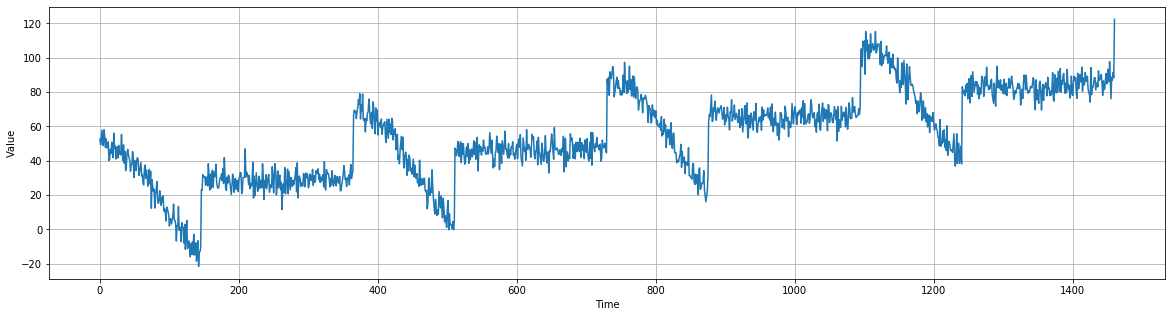

In [6]:
plt.figure(figsize=(20,5))
plot_series(time,series)

# Function to create tensorflow dataset:

In [7]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    
    # Create dataset from numpy
    dataset = tf.data.Dataset.from_tensor_slices(series) 
    # Create windowed dataset with fixed shape
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True) 
    #Create a batch for each window and flatten it (convert to tensor)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1)) 
    # Shuffle data
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    # Create batches
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [15]:
# Create Train dataset

train_set = windowed_dataset(x_train, window_size, batch_size=128, shuffle_buffer=shuffle_buffer_size)

# Build RNN model :

model = tf.keras.models.Sequential([
        tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=-1),input_shape=[None]),
        tf.keras.layers.SimpleRNN(40,return_sequences=True),
        tf.keras.layers.SimpleRNN(40),
        tf.keras.layers.Dense(1),
        tf.keras.layers.Lambda(lambda x:x*100)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])


history = model.fit(train_set,epochs=400)

Epoch 1/400
8/8 [==============================] - 6s 692ms/step - loss: 14.4001 - mae: 15.0076
Epoch 2/400
8/8 [==============================] - 1s 93ms/step - loss: 13.2052 - mae: 13.7335
Epoch 3/400
8/8 [==============================] - 1s 85ms/step - loss: 12.0927 - mae: 12.6162
Epoch 4/400
8/8 [==============================] - 1s 69ms/step - loss: 11.6778 - mae: 12.2032
Epoch 5/400
8/8 [==============================] - 1s 73ms/step - loss: 10.9577 - mae: 11.4837
Epoch 6/400
8/8 [==============================] - 1s 72ms/step - loss: 10.2575 - mae: 10.7739
Epoch 7/400
8/8 [==============================] - 1s 72ms/step - loss: 9.6337 - mae: 10.1486
Epoch 8/400
8/8 [==============================] - 1s 76ms/step - loss: 8.9421 - mae: 9.4562
Epoch 9/400
8/8 [==============================] - 1s 100ms/step - loss: 8.3368 - mae: 8.8465
Epoch 10/400
8/8 [==============================] - 1s 98ms/step - loss: 7.7221 - mae: 8.2307
Epoch 11/400
8/8 [==============================] - 1s

8/8 [==============================] - 1s 73ms/step - loss: 5.3677 - mae: 5.8499
Epoch 87/400
8/8 [==============================] - 1s 101ms/step - loss: 5.3585 - mae: 5.8408
Epoch 88/400
8/8 [==============================] - 1s 101ms/step - loss: 5.3494 - mae: 5.8318 0s - loss: 5.1836 - mae: 5.663
Epoch 89/400
8/8 [==============================] - 1s 75ms/step - loss: 5.3405 - mae: 5.8228
Epoch 90/400
8/8 [==============================] - 1s 73ms/step - loss: 5.3315 - mae: 5.8139
Epoch 91/400
8/8 [==============================] - 1s 91ms/step - loss: 5.3223 - mae: 5.8047
Epoch 92/400
8/8 [==============================] - 1s 74ms/step - loss: 5.3134 - mae: 5.7957
Epoch 93/400
8/8 [==============================] - 1s 93ms/step - loss: 5.3045 - mae: 5.7867
Epoch 94/400
8/8 [==============================] - 1s 73ms/step - loss: 5.2958 - mae: 5.7779
Epoch 95/400
8/8 [==============================] - 1s 92ms/step - loss: 5.2874 - mae: 5.7693
Epoch 96/400
8/8 [======================

8/8 [==============================] - 1s 69ms/step - loss: 4.8420 - mae: 5.3241
Epoch 173/400
8/8 [==============================] - 1s 95ms/step - loss: 4.8402 - mae: 5.3224
Epoch 174/400
8/8 [==============================] - 1s 64ms/step - loss: 4.8384 - mae: 5.3207
Epoch 175/400
8/8 [==============================] - 1s 69ms/step - loss: 4.8367 - mae: 5.3189
Epoch 176/400
8/8 [==============================] - 1s 70ms/step - loss: 4.8349 - mae: 5.3171
Epoch 177/400
8/8 [==============================] - 1s 69ms/step - loss: 4.8332 - mae: 5.3153
Epoch 178/400
8/8 [==============================] - 1s 66ms/step - loss: 4.8316 - mae: 5.3136
Epoch 179/400
8/8 [==============================] - 0s 55ms/step - loss: 4.8301 - mae: 5.3119
Epoch 180/400
8/8 [==============================] - 1s 102ms/step - loss: 4.8287 - mae: 5.3103
Epoch 181/400
8/8 [==============================] - 1s 120ms/step - loss: 4.8272 - mae: 5.3088
Epoch 182/400
8/8 [==============================] - 1s 117ms/

8/8 [==============================] - 1s 94ms/step - loss: 4.7131 - mae: 5.1925
Epoch 258/400
8/8 [==============================] - 1s 81ms/step - loss: 4.7122 - mae: 5.1916
Epoch 259/400
8/8 [==============================] - 1s 83ms/step - loss: 4.7113 - mae: 5.1906
Epoch 260/400
8/8 [==============================] - 1s 96ms/step - loss: 4.7103 - mae: 5.1897
Epoch 261/400
8/8 [==============================] - 1s 88ms/step - loss: 4.7094 - mae: 5.1887
Epoch 262/400
8/8 [==============================] - 1s 80ms/step - loss: 4.7085 - mae: 5.1878
Epoch 263/400
8/8 [==============================] - 1s 70ms/step - loss: 4.7077 - mae: 5.1869
Epoch 264/400
8/8 [==============================] - 1s 91ms/step - loss: 4.7068 - mae: 5.1860
Epoch 265/400
8/8 [==============================] - 1s 79ms/step - loss: 4.7058 - mae: 5.1850
Epoch 266/400
8/8 [==============================] - 1s 75ms/step - loss: 4.7049 - mae: 5.1841
Epoch 267/400
8/8 [==============================] - 1s 94ms/ste

Epoch 343/400
8/8 [==============================] - 1s 69ms/step - loss: 4.6379 - mae: 5.1154
Epoch 344/400
8/8 [==============================] - 1s 98ms/step - loss: 4.6370 - mae: 5.1146
Epoch 345/400
8/8 [==============================] - 1s 92ms/step - loss: 4.6362 - mae: 5.1138
Epoch 346/400
8/8 [==============================] - 1s 81ms/step - loss: 4.6354 - mae: 5.1129
Epoch 347/400
8/8 [==============================] - 1s 77ms/step - loss: 4.6346 - mae: 5.1121
Epoch 348/400
8/8 [==============================] - 1s 87ms/step - loss: 4.6338 - mae: 5.1113
Epoch 349/400
8/8 [==============================] - 1s 104ms/step - loss: 4.6330 - mae: 5.1105
Epoch 350/400
8/8 [==============================] - 1s 99ms/step - loss: 4.6322 - mae: 5.1097
Epoch 351/400
8/8 [==============================] - 1s 75ms/step - loss: 4.6314 - mae: 5.1088
Epoch 352/400
8/8 [==============================] - 1s 99ms/step - loss: 4.6306 - mae: 5.1080
Epoch 353/400
8/8 [==============================

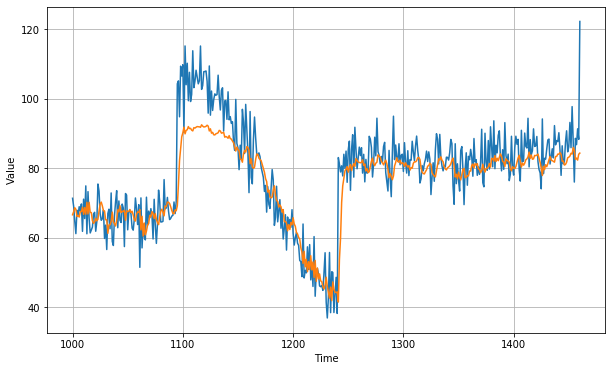

In [16]:
forecast=[]
for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)